Question 1 - Use logistic regression to find the decision boundary For the given database. Set your learning rate to 0.1. What is the cost function value and learning parameter value after convergence?

In [4]:
import numpy as np
import pandas as pd

# Load dataset
X = pd.read_csv("logisticX.csv", header=None)
Y = pd.read_csv("logisticY.csv", header=None)

# Normalize features
X_mean = X.mean()
X_std = X.std()
X_normalized = (X - X_mean) / X_std

# Convert to numpy arrays
X_np = X_normalized.to_numpy()
Y_np = Y.to_numpy().flatten()

# Add bias term (intercept)
X_np = np.c_[np.ones(X_np.shape[0]), X_np]

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, Y, theta):
    m = len(Y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h))
    return cost

# Gradient Descent function
def gradient_descent(X, Y, alpha=0.1, iterations=1000, tolerance=1e-6):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    
    for i in range(iterations):
        h = sigmoid(X @ theta)
        gradient = (1/m) * (X.T @ (h - Y))
        theta -= alpha * gradient
        
        cost = compute_cost(X, Y, theta)
        cost_history.append(cost)
        
        # Check convergence
        if i > 0 and abs(cost_history[-1] - cost_history[-2]) < tolerance:
            break
    
    return theta, cost_history

# Train model with alpha=0.1
theta_optimal, cost_history = gradient_descent(X_np, Y_np, alpha=0.1)
final_cost = cost_history[-1]

# Print results
print("Optimal Theta (Learned Parameters):", theta_optimal)
print("Final Cost Function Value:", final_cost)

Optimal Theta (Learned Parameters): [ 0.32297575  2.39501804 -2.50354765]
Final Cost Function Value: 0.22913059679819603


Question 2 - Plot cost function v/s iteration graph for the model trained in question 1. Plot the line as shown here https://pythonguides.com/matplotlib-plot-a-line/#Matplotlib_plot_a_line_chart. Do not use scatter plots for this.

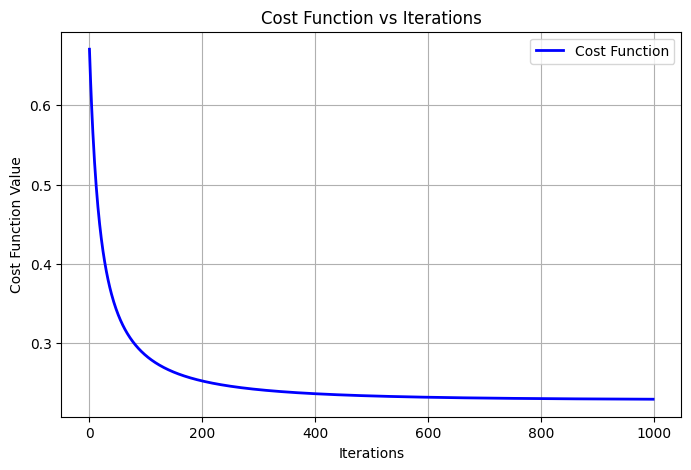

In [5]:
import matplotlib.pyplot as plt

# Question 2: Plot cost function vs iterations
plt.figure(figsize=(8, 5))
plt.plot(range(len(cost_history)), cost_history, label="Cost Function", color="b", linewidth=2)
plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("Cost Function vs Iterations")
plt.legend()
plt.grid()
plt.show()

Question 3 - Plot the given dataset on a graph, use different colours for different classes and also show the decision boundary you obtained in question 1. Do not use scatter plot.

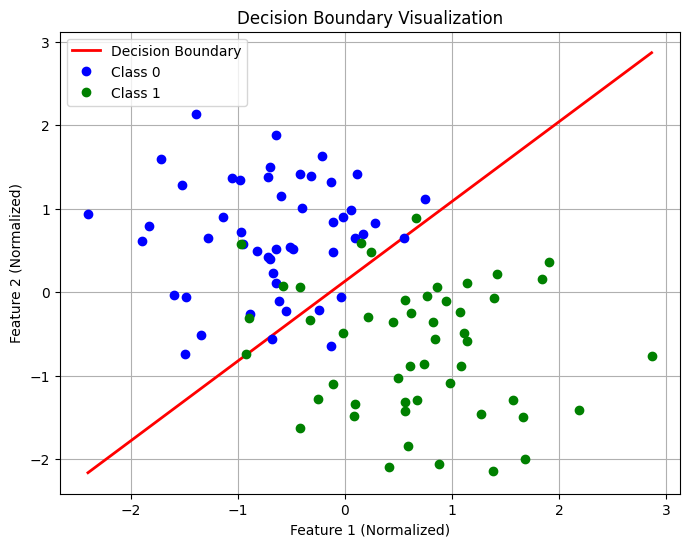

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate points for the decision boundary
x_values = np.linspace(X_np[:, 1].min(), X_np[:, 1].max(), 100)
y_values = -(theta_optimal[0] + theta_optimal[1] * x_values) / theta_optimal[2]

# Plot the dataset and decision boundary
plt.figure(figsize=(8, 6))

# Plot data points with different colors for each class
plt.plot(x_values, y_values, color='red', label='Decision Boundary', linewidth=2)
plt.plot(X_np[:, 1][Y_np == 0], X_np[:, 2][Y_np == 0], 'bo', label='Class 0')  # Blue for Class 0
plt.plot(X_np[:, 1][Y_np == 1], X_np[:, 2][Y_np == 1], 'go', label='Class 1')  # Green for Class 1

# Labels and title
plt.xlabel("Feature 1 (Normalized)")
plt.ylabel("Feature 2 (Normalized)")
plt.legend()
plt.title("Decision Boundary Visualization")
plt.grid()
plt.show()

Question - 4 Train your model with a learning rate of 0.1 and 5. Plot the cost-function v/s iteration curve for both learning rates on the same graph.For this task, only train your model for 100 iterations.

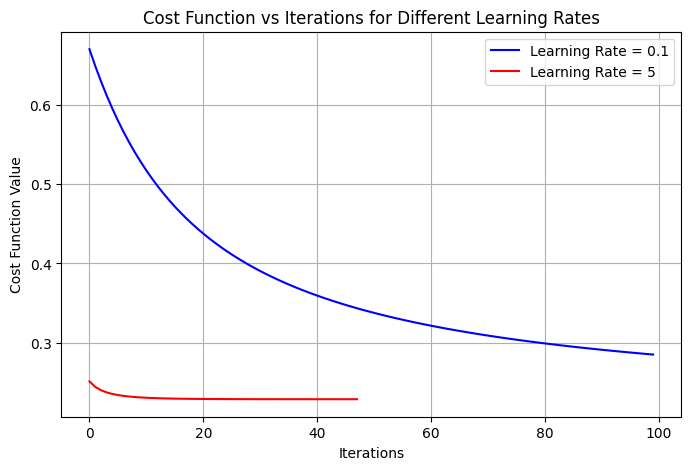

In [7]:
# Train model with learning rate 0.1
theta_01, cost_history_01 = gradient_descent(X_np, Y_np, alpha=0.1, iterations=100)

# Train model with learning rate 5
theta_5, cost_history_5 = gradient_descent(X_np, Y_np, alpha=5, iterations=100)

# Plot cost function vs. iterations for both learning rates
plt.figure(figsize=(8, 5))
plt.plot(range(len(cost_history_01)), cost_history_01, label="Learning Rate = 0.1", color="b")
plt.plot(range(len(cost_history_5)), cost_history_5, label="Learning Rate = 5", color="r")
plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("Cost Function vs Iterations for Different Learning Rates")
plt.legend()
plt.grid()
plt.show()

Question 5 - Find the confusion matrix for your training dataset. Using the confusion matrix to calculate the accuracy, precision, recall, F1-score.

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Make predictions using learned parameters
y_pred = (sigmoid(X_np @ theta_optimal) >= 0.5).astype(int)

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_np, y_pred)

# Calculate performance metrics
accuracy = accuracy_score(Y_np, y_pred)
precision = precision_score(Y_np, y_pred)
recall = recall_score(Y_np, y_pred)
f1 = f1_score(Y_np, y_pred)

# Print results
print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Confusion Matrix:
 [[45  5]
 [ 8 42]]
Accuracy: 0.8700
Precision: 0.8936
Recall: 0.8400
F1 Score: 0.8660
